In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("Mall_Customers.csv")
print(df[:5])

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
x=df.iloc[:,[3,4]].values
print(x[:5])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


In [4]:
# onehot encoding
'''from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))'''

"from sklearn.compose import ColumnTransformer\nfrom sklearn.preprocessing import OneHotEncoder\nct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')\nx = np.array(ct.fit_transform(x))"

In [5]:
k=5 #no of clusters.
centroids=x[np.random.choice(x.shape[0],k,replace=False), :]
print("centroids\n",centroids)

centroids
 [[77 74]
 [71 35]
 [78 17]
 [20 79]
 [60 49]]


In [6]:
eucledian_dists=np.zeros((x.shape[0],k))
curr_cluster=np.zeros((x.shape[0],1))

In [7]:
j=0
while j<1000:
    #np.argmax(arr) gives maximum occured element index
    clusters={}
    for i in range(k):
        eucledian_dists[:,[i]]=np.sqrt(np.array(np.sum((x-centroids[i])**2,axis=1).reshape((x.shape[0],1)),dtype=np.int64))
    for i in range(k):
        clusters[i]=np.array([centroids[i]])
    for i in range(x.shape[0]):
        clusters[np.argmax(eucledian_dists[i])]=np.concatenate((clusters[np.argmax(eucledian_dists[i])],
                                                               x[i].reshape(1,x.shape[1])), axis=0)
    for i in range(k):
        clusters[i]=clusters[i][1:]
        if clusters[i].shape[0]!=0:
            centroids[i]=np.mean(clusters[i],axis=0)
    j+=1

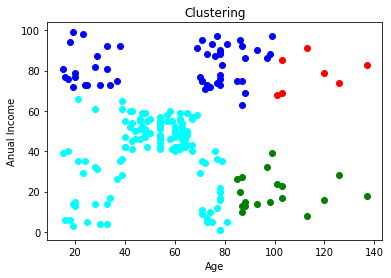

In [8]:
# Visualising the Training set results
import matplotlib.pyplot as plt
cls_clr={0:"red",1:"green",2:"blue",3:"cyan",4:"yellow"}
for i in range(k):
    for j in clusters[i]:
        plt.scatter(j[0],j[1], color=cls_clr[i])
plt.title('Clustering')
plt.xlabel('Age')
plt.ylabel('Anual Income')
plt.show()